In [8]:
#一様、cos^1、cos^2、cos^3でどれくらいtheta分布やその重心が変化するのか調べる

In [9]:
#ファイル名など定義
############################################
filename = "theta_"
num = 1
number = str(num)
############################################

In [10]:
#定数などの定義
N = 10000  # 試行回数
N2 = 1000 #theta2用の細かさ

import pandas as pd
sf = pd.read_csv('angel_data.csv', header=None)
df = pd.read_csv('curve_plot.csv', header=None)

#データ取得(df)
int_time = sf.at[num, 1]
end_time = sf.at[num, 2]
hiduke = str(int_time) + "～" + str(end_time)

time = df.at[num, 1]
data = [float(df.at[num, i+2]) for i in range(5)]
rate = [float(df.at[num, i+7]) for i in range(5)]
flux = [float(df.at[num, i+12]) for i in range(5)]
theta_center = [float(df.at[num, i+17]) for i in range(5)]


#シンチのサイズ、位置定義
######################################################
import numpy as np
Nsinci = 4
coin = 5

radius_inner = [6, 7, 0, 0]
radius_outer = [14.95, 11.5, 4, 5]
shiftx = [0]*Nsinci
z = [float(sf.at[num, i+4]) for i in range(Nsinci)]

S = [np.pi*(a**2 - b**2) for a,b in zip(radius_outer, radius_inner)]
slist = [S[2], S[3], S[2], S[3], S[2]]

nbin=90

In [11]:
Ncos = 7
theta_list = [[] for i in range(Ncos)]
# nlist = np.linspace(0, 3, Ncos)
# print(nlist)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def run_theta_simulation(cos_number, label):
    # 初期化
    count_hit = [0] * coin
    angles_theta = [[] for _ in range(coin)]
    thetas_n = []
    ss_n = []
    
    # # θ の分布を作成
    delta = np.pi / 2 / N2
    for i in range(N2):
        theta3 = delta * (2 * i + 1) / 2
        thetas_n.append(theta3)
        si = delta * (np.cos(theta3)**cos_number * np.sin(theta3))
        ss_n.append(si)
    ssum_n = np.sum(ss_n)
    ssi_n = [x / ssum_n for x in ss_n]
    
    # モンテカルロループ
    for _ in range(N):
        u = np.random.uniform(0, 1)
        phi = 2 * np.pi * u
        theta = np.random.choice(thetas_n, p=ssi_n)
        
        dx = np.sin(theta) * np.cos(phi)
        dy = np.sin(theta) * np.sin(phi)
        dz = np.cos(theta)

        def random_mc(label_mc, r_inner_int, r_outer_int, shiftx_int, r_inner_end, r_outer_end, shiftx_end, zint, zend): # ,dx, dy, dz, count_hit, angles_theta):

            # int上にランダムに点を生成
            r = np.sqrt(np.random.uniform(r_inner_int**2, r_outer_int**2))
            theta_r = np.random.uniform(0, 2*np.pi)
            x0 = r * np.cos(theta_r) + shiftx_int
            y0 = r * np.sin(theta_r)

            # 直線: r(t) = (x0 + dx*t, y0 + dy*t, z0 + dz*t)
            # z = d となるときの t:
            d = zend-zint
            ta = d / dz
            xa = x0 + dx * ta
            ya = y0 + dy * ta
            
            # endの中心からの距離で判定
            if r_inner_end**2 <= (xa-shiftx_end)**2 + (ya)**2 <= r_outer_end**2:
                count_hit[label_mc] += 1
                angles_theta[label_mc].append(np.degrees(theta))
                
        # ここでランダムヒット判定
        random_mc(0, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[0], radius_outer[0], shiftx[0], z[2], z[0])#, dx, dy, dz, count_hit, angles_theta)
        random_mc(1, radius_inner[3], radius_outer[3], shiftx[0], radius_inner[0], radius_outer[0], shiftx[0], z[3], z[0])#, dx, dy, dz, count_hit, angles_theta)
        random_mc(2, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[1], radius_outer[1], shiftx[0], z[2], z[1])#, dx, dy, dz, count_hit, angles_theta)
        random_mc(3, radius_inner[3], radius_outer[3], shiftx[0], radius_inner[1], radius_outer[1], shiftx[0], z[3], z[1])#, dx, dy, dz, count_hit, angles_theta)
        random_mc(4, radius_inner[2], radius_outer[2], shiftx[0], radius_inner[3], radius_outer[3], shiftx[0], z[2], z[3])#, dx, dy, dz, count_hit, angles_theta)

    # ヒストグラム計算
    hist_center = [0]*coin
    for i in range(coin):
        if len(angles_theta[i]) > 0:
            counts, bins, patches = plt.hist(angles_theta[i], range=(0,90), bins=nbin, color="lightblue", label=i)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])

            if np.sum(counts) > 0:
                hist_center[i] = np.sum(bin_centers * counts) / np.sum(counts)
                total_counts = np.sum(counts)
                mean = np.sum(bin_centers * counts) / total_counts
                variance = np.sum(counts * (bin_centers - mean)**2) / total_counts
                std = np.sqrt(variance)
                theta_error = std
            else:
                hist_center[i] = 0
        else:
            hist_center[i] = 0
    theta_list[label] = hist_center

theta_list[0] [np.float64(74.0920745920746), np.float64(34.147450110864746), np.float64(46.486623863028356), np.float64(54.9577530176416), np.float64(16.63533834586466)]
theta_list [[np.float64(74.0920745920746), np.float64(34.147450110864746), np.float64(46.486623863028356), np.float64(54.9577530176416), np.float64(16.63533834586466)], [np.float64(72.62812872467222), np.float64(33.46325985303941), np.float64(46.378100940975195), np.float64(53.3828642384106), np.float64(16.51988950276243)], [np.float64(71.32485875706215), np.float64(32.91268950028074), np.float64(45.524750499001996), np.float64(52.33917878528657), np.float64(15.927323272438443)], [np.float64(69.70567375886525), np.float64(32.88371810449575), np.float64(44.952141527001864), np.float64(51.53859496964441), np.float64(16.129830508474576)], [np.float64(68.51797385620915), np.float64(32.32157859827548), np.float64(44.54352806414662), np.float64(50.334634818557646), np.float64(15.553348467650398)], [np.float64(66.955188679245

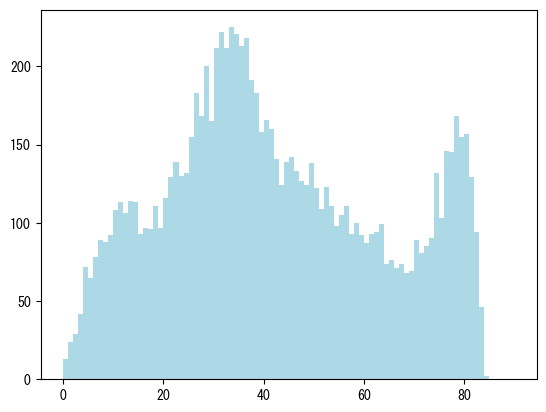

In [13]:
#シミュレーションする
nlist = np.linspace(0, 3, Ncos)
for i in range(Ncos):
    run_theta_simulation(float(nlist[i]), int(i))
print("theta_list[0]", theta_list[0])
print("theta_list", theta_list)

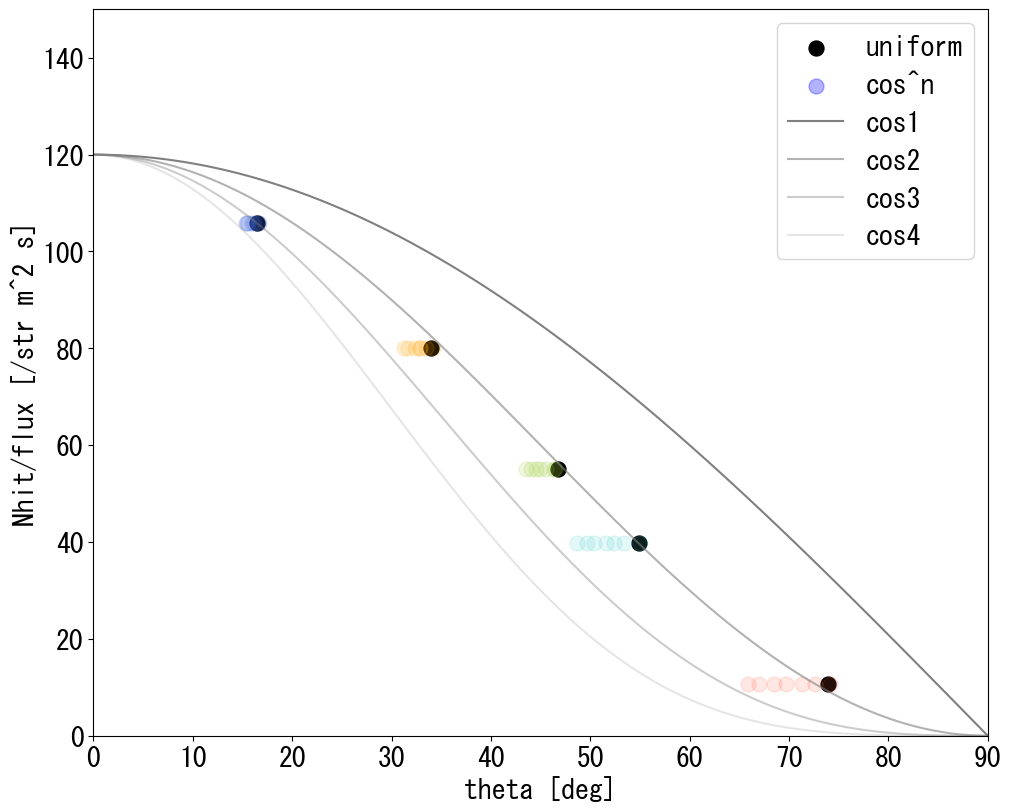

In [14]:
#グラフ作成
#画像作成
#一部ファイルごとに異なる
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']
cmap = plt.get_cmap('rainbow')  # 'hsv', 'nipy_spectral' などもOK
colorlist2 = [cmap((Ncos-i) / Ncos) for i in range(Ncos)]

plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax5 = fig.add_subplot(1, 1, 1)

yoko = [x for x in theta_center]
tate = [a/b for a,b in zip(rate, flux)]

theta = np.linspace(0, 90, 100)
peak0 = 120
cos1 = [peak0*np.cos(x/180*np.pi) for x in theta ]
cos2 = [peak0*np.cos(x/180*np.pi)**2 for x in theta ]
cos3 = [peak0*np.cos(x/180*np.pi)**3 for x in theta ]
cos4 = [peak0*np.cos(x/180*np.pi)**4 for x in theta ]


ax = ax5
for i in range(len(yoko)):
    ax.scatter(yoko[i], tate[i], color="black", alpha=1.0, s=115)
    for j in range(Ncos):
        ax.scatter(theta_list[j][i], tate[i], color=colorlist[i], alpha=0.15, s=115)

ax.scatter(-10, -10, color="black", alpha=1.0, label="uniform", s=115)
ax.scatter(-10, -10, color="blue", alpha=0.3, label="cos^n", s=115)

ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=1.0)
ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=0.6)
ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.4)
ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,150)
ax.legend(fontsize=20)

fig.savefig("./pic/error2/" + filename + number + ".png", dpi=300)  # 画像を保存
plt.show()

In [16]:
#errorの計算
diff_theta = [0]*5
for i in range(5):
    diff_theta[i] = abs(theta_center[i] - theta_list[Ncos-1][i])

error2_theta = [float(diff/theta) for diff, theta in zip(diff_theta, theta_center)]
print(error2_theta)

for i in range(5):
    df.at[num, i+27] = error2_theta[i]
df.to_csv('curve_plot.csv', index=False, header=False)

[0.10970820144496758, 0.07860454888902867, 0.06995603221449191, 0.11439716944532641, 0.06925130762247268]
